###### Евгений Сахно, 1 курс МОАД ВШЭ
# Домашнее задание на 25 ноября

## Задача 1
Импортируем необходимые библиотеки.

In [4]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Заведем функции, считающие квантили распределений хи-квадрат и нормального распределения c помощью бинпоиска, используя функции распределения из библиотеки scipy.

In [45]:
def chi2_quantile(n, p):
    eps = 1e-8
    l = 0.
    r = 1e6
    while r - l > eps:
        m = (l + r) / 2
        if st.chi2.cdf(m, n) < p:
            l = m
        else:
            r = m
    return (r + l) / 2

In [66]:
def norm_quantile(p):
    eps = 1e-8
    r = 1e5
    l = -r
    while r - l > eps:
        m = (l + r) / 2
        if st.norm.cdf(m) < p:
            l = m
        else:
            r = m
    return (r + l) / 2

Теперь заведем функции, выдающие доверительные интервалы по данным в условии выражениям. Функции принимают на вход размер выборки и порядок интервала, генерируют выборку из нормального распределения и возвращают посчитанные с помощью этой выборки начало и конец интервала.

In [21]:
def conf_int_1(n=1000, gamma=0.1, d=1):
    X = np.random.default_rng().normal(0, d, n)
    qntl1 = chi2_quantile(n, (1 + gamma) / 2)
    qntl2 = chi2_quantile(n, (1 - gamma) / 2)
    sumX2 = np.sum(np.square(X))
    return sumX2 / qntl1, sumX2 / qntl2

In [22]:
def conf_int_2(n=1000, gamma=0.1, d=1):
    X = np.random.default_rng().normal(0, d, n)
    qntl1 = norm_quantile((3 + gamma) / 4)
    qntl2 = norm_quantile((3 - gamma) / 4)
    meanX2 = np.mean(X) ** 2
    return n * meanX2 / qntl1 ** 2, n * meanX2 / qntl2 ** 2

Сначала изучим первый вариант. Для этого построим графики зависимости начала и конца этого интервала от размера выборки, а также график зависимости длины отерзка, чтобы лучше было её видно. Графики построим для $\gamma = 0.9$ и $\gamma = 0.5$.

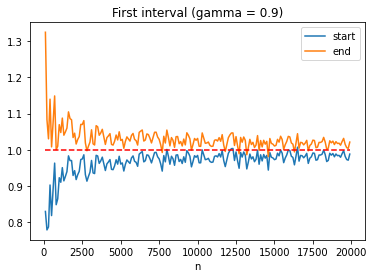

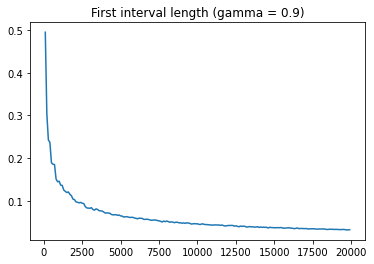

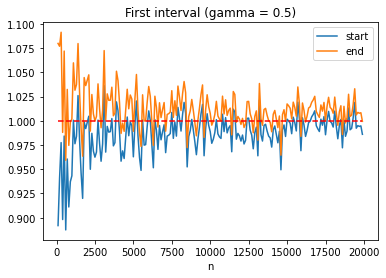

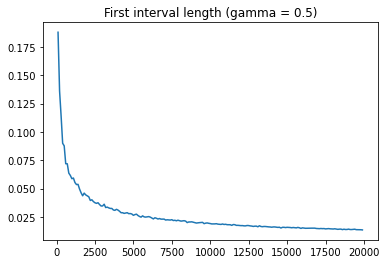

In [69]:
def plot_int1(gamma, n_list=list(range(100, 20000, 100))):
    int1_start = np.zeros(len(n_list))
    int1_end = np.zeros(len(n_list))
    for i in range(len(n_list)):
        int1_start[i], int1_end[i] = conf_int_1(n_list[i], gamma)
    plt.title('First interval (gamma = ' + str(gamma) + ')')
    plt.xlabel('n')
    plt.plot(n_list, int1_start, label='start')
    plt.plot(n_list, int1_end, label='end')
    plt.plot(n_list, [1] * len(n_list), '--', c='red')
    plt.legend()
    plt.show()
    plt.title('First interval length (gamma = ' + str(gamma) + ')')
    plt.plot(n_list, int1_end - int1_start)
    plt.show()
    
plot_int1(0.9)
plot_int1(0.5)

Видно, что интервалы колеблются вокруг единицы - нашей дисперсии, при этом амплитуда колебаний медленно уменьшается. Также, как и ожидалось, в случае $\gamma = 0.9$ дисперсия почти всегда лежит в полученном интервале, а в случае $\gamma = 0.5$ - примерно в половине случаев. Также длина интервала быстро уменьшается с ростом $n$, что логично - чем больше выборка, тем точнее оценка.

Теперь построим такие же графики для второго варианта.

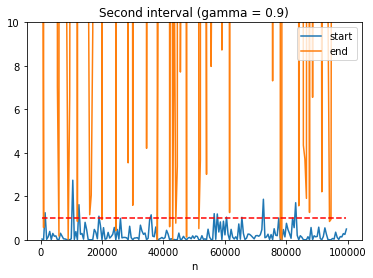

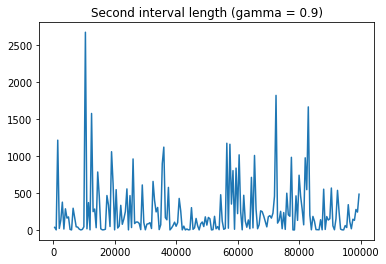

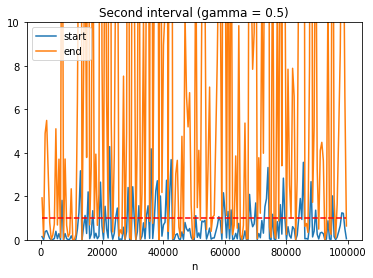

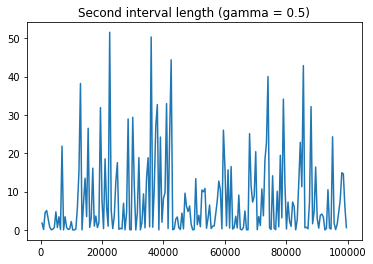

In [72]:
def plot_int2(gamma, n_list=list(range(500, 100000, 500))):
    int2_start = np.zeros(len(n_list))
    int2_end = np.zeros(len(n_list))
    for i in range(len(n_list)):
        int2_start[i], int2_end[i] = conf_int_2(n_list[i], gamma)
    plt.title('Second interval (gamma = ' + str(gamma) + ')')
    plt.xlabel('n')
    plt.ylim((0, 10))
    plt.plot(n_list, int2_start, label='start')
    plt.plot(n_list, int2_end, label='end')
    plt.plot(n_list, [1] * len(n_list), '--', c='red')
    plt.legend()
    plt.show()
    plt.title('Second interval length (gamma = ' + str(gamma) + ')')
    plt.plot(n_list, int2_end - int2_start)
    plt.show()
    
plot_int2(0.9)
plot_int2(0.5)

Здесь по нижним границам хорошо видно, что вероятность того, что дисперсия попадет в интервал, соответствует $\gamma$. Однако верхние границы улетают далеко вверх, и длины интервалов с увеличением размера выборки не уменьшаются.